In [1]:
from qiskit_algorithms.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal

In [2]:
num_qubits = 2
ansatz = TwoLocal(num_qubits, "ry", "cz")
optimizer = SLSQP(maxiter=1000)

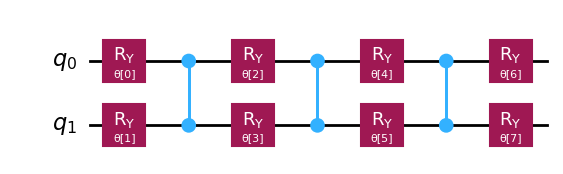

In [3]:
ansatz.decompose().draw("mpl", style="iqx")

In [4]:
from qiskit.primitives import Estimator

In [5]:
estimator = Estimator()

In [6]:
from qiskit_algorithms import VQE

In [7]:
vqe = VQE(estimator, ansatz, optimizer)

In [8]:
from qiskit.quantum_info import SparsePauliOp

In [9]:
H2_op = SparsePauliOp.from_list([
    ("II", -1.052373245772859),
    ("IZ", 0.39793742484318045),
    ("ZI", -0.39793742484318045),
    ("ZZ", -0.01128010425623538),
    ("XX", 0.18093119978423156)
])


In [10]:
result = vqe.compute_minimum_eigenvalue(H2_op)
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 74,
    'eigenvalue': -1.8572746659828205,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x13fc96740>,
    'optimal_parameters': {   ParameterVectorElement(θ[0]): 0.29329116964361257,
                              ParameterVectorElement(θ[1]): 0.25142690727696565,
                              ParameterVectorElement(θ[2]): 2.850396784458417,
                              ParameterVectorElement(θ[3]): 5.316379649522397,
                              ParameterVectorElement(θ[4]): 4.217065768863795,
                              ParameterVectorElement(θ[5]): 2.707633340972301,
                              ParameterVectorElement(θ[6]): -2.1328641009574887,
                              ParameterVectorElement(θ[7]): 2.9440680820749265},
    'optimal_point': array([ 0.29329117,  0.25142691,  2.85039678,  5.31637965,  4.21706577,
        2.70763334, -2.1328641 ,  2.94406808]),
    'optimal_v

In [11]:
from qiskit_algorithms.optimizers import SPSA

In [12]:
estimator = Estimator(options={"shots": 1000})

vqe.estimator = estimator
vqe.optimizer = SPSA(maxiter=100)
result = vqe.compute_minimum_eigenvalue(operator=H2_op)
print(result)


{   'aux_operators_evaluated': None,
    'cost_function_evals': 200,
    'eigenvalue': -1.857293500907641,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x179b3bdf0>,
    'optimal_parameters': {   ParameterVectorElement(θ[0]): 2.67180681620934,
                              ParameterVectorElement(θ[1]): -0.9468045844710817,
                              ParameterVectorElement(θ[2]): 6.388658410068174,
                              ParameterVectorElement(θ[3]): 0.8014829159432943,
                              ParameterVectorElement(θ[4]): 3.9696666494088624,
                              ParameterVectorElement(θ[5]): -0.5443334745350117,
                              ParameterVectorElement(θ[6]): -2.6744926925675667,
                              ParameterVectorElement(θ[7]): -4.046380326481173},
    'optimal_point': array([ 2.67180682, -0.94680458,  6.38865841,  0.80148292,  3.96966665,
       -0.54433347, -2.67449269, -4.04638033]),
    'optimal_

In [14]:
from qiskit.quantum_info import SparsePauliOp

H2_op = SparsePauliOp.from_list(
    [
        ("II", -1.052373245772859),
        ("IZ", 0.39793742484318045),
        ("ZI", -0.39793742484318045),
        ("ZZ", -0.01128010425623538),
        ("XX", 0.18093119978423156),
    ]
)

In [15]:
from qiskit.primitives import Estimator

estimator = Estimator()

In [16]:
import numpy as np

from qiskit.circuit.library import TwoLocal

from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B, SLSQP
from qiskit_algorithms.utils import algorithm_globals

# we will iterate over these different optimizers
optimizers = [COBYLA(maxiter=80), L_BFGS_B(maxiter=60), SLSQP(maxiter=60)]
converge_counts = np.empty([len(optimizers)], dtype=object)
converge_vals = np.empty([len(optimizers)], dtype=object)

for i, optimizer in enumerate(optimizers):
    print("\rOptimizer: {}        ".format(type(optimizer).__name__), end="")
    algorithm_globals.random_seed = 50
    ansatz = TwoLocal(rotation_blocks="ry", entanglement_blocks="cz")

    counts = []
    values = []

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    vqe = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)
    result = vqe.compute_minimum_eigenvalue(operator=H2_op)
    converge_counts[i] = np.asarray(counts)
    converge_vals[i] = np.asarray(values)

print("\rOptimization complete      ");

Optimization complete      


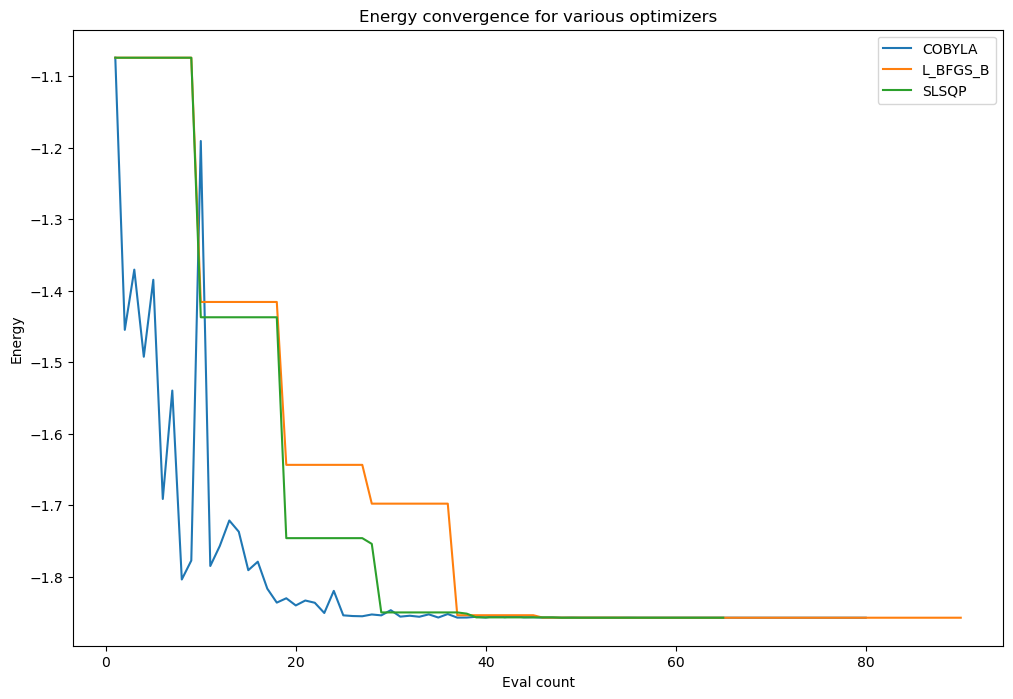

In [17]:
import pylab

pylab.rcParams["figure.figsize"] = (12, 8)
for i, optimizer in enumerate(optimizers):
    pylab.plot(converge_counts[i], converge_vals[i], label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for various optimizers")
pylab.legend(loc="upper right");